## Data Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from imports import *

2024-09-27 11:20:38.929079: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-27 11:20:40.741550: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 11:20:42.839656: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
from models import *
from data import * 
from env import *
from harmonize import *
from metrics import * 
from sim import *

In [5]:
# overall imports
import importlib
import data

# data load
#importlib.reload(data.data_load)
#importlib.reload(data.data_viz)

from data.data_load import load_transcriptome, load_connectome, load_coords
from data.data_viz import plot_connectome, plot_connectome_with_labels, plot_transcriptome
importlib.reload(data.data_load)
importlib.reload(data.data_viz)

# data utils
from data.data_utils import (
    reconstruct_connectome,
    reconstruct_upper_triangle,
    make_symmetric,
    expand_X_symmetric,
    expand_Y_symmetric,
    expand_X_symmetric_shared,
    expand_X_Y_symmetric_conn_only,
    expand_shared_matrices,
    expand_X_symmetric_w_conn, 
    process_cv_splits, 
    process_cv_splits_conn_only_model, 
    expanded_inner_folds_combined_plus_indices
)

import data.data_utils
importlib.reload(data.data_utils)

# cross-validation classes
import data.cv_split
from data.cv_split import RandomCVSplit, SchaeferCVSplit, CommunityCVSplit, SubnetworkCVSplit
importlib.reload(data.cv_split)

# prebuilt model classes
import models.prebuilt_models
from models.prebuilt_models import ModelBuild
importlib.reload(models.prebuilt_models)

# metric classes
import metrics.distance_FC
import metrics.eval
from metrics.eval import ModelEvaluator
from metrics.eval import pearson_numpy, mse_numpy, r2_numpy, pearson_cupy, mse_cupy, r2_cupy
importlib.reload(metrics.eval)

# sim class
import sim.sim 
from sim.sim import Simulation
importlib.reload(sim.sim)


<module 'sim.sim' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim.py'>

[Sims](#sims)

### HCP Connectivity Data

#### fMRI

(114, 114)


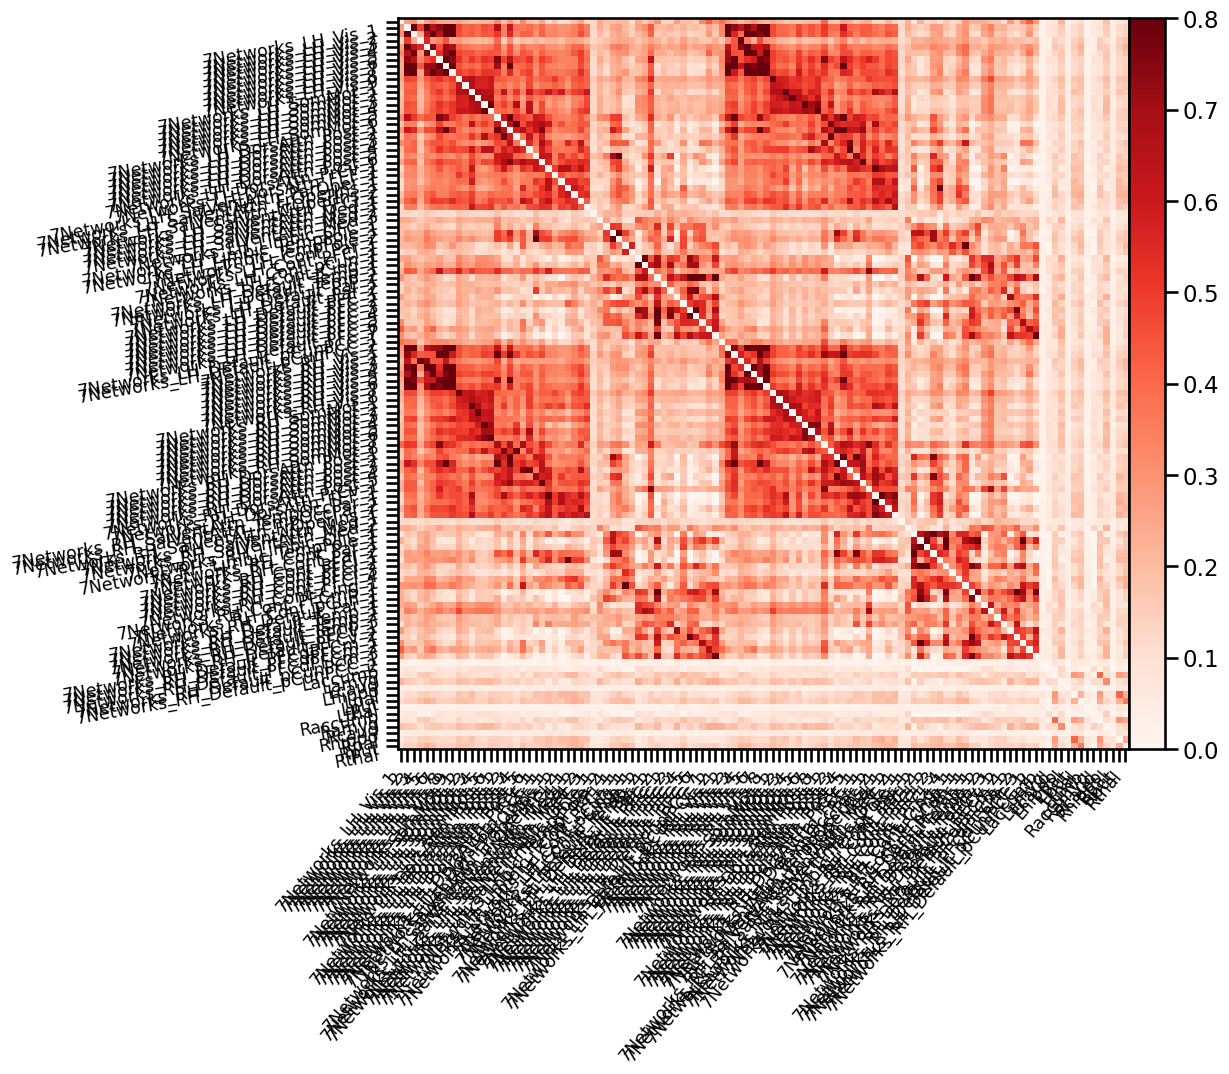

In [9]:
fc_combined_mat_schaef_100, fc_combined_labels_schaef_100 = load_fc_as_one(parcellation='schaefer_100')
print(fc_combined_mat_schaef_100.shape)
fc_all_schaef = plotting.plot_matrix(fc_combined_mat_schaef_100, figure=(9, 9), labels=fc_combined_labels_schaef_100, vmax=0.8, vmin=0, cmap='Reds')

In [10]:
print(fc_combined_labels_schaef_100)
print(fc_combined_mat_schaef_100)
Y_fc = fc_combined_mat_schaef_100

['7Networks_LH_Vis_1' '7Networks_LH_Vis_2' '7Networks_LH_Vis_3'
 '7Networks_LH_Vis_4' '7Networks_LH_Vis_5' '7Networks_LH_Vis_6'
 '7Networks_LH_Vis_7' '7Networks_LH_Vis_8' '7Networks_LH_Vis_9'
 '7Networks_LH_SomMot_1' '7Networks_LH_SomMot_2' '7Networks_LH_SomMot_3'
 '7Networks_LH_SomMot_4' '7Networks_LH_SomMot_5' '7Networks_LH_SomMot_6'
 '7Networks_LH_DorsAttn_Post_1' '7Networks_LH_DorsAttn_Post_2'
 '7Networks_LH_DorsAttn_Post_3' '7Networks_LH_DorsAttn_Post_4'
 '7Networks_LH_DorsAttn_Post_5' '7Networks_LH_DorsAttn_Post_6'
 '7Networks_LH_DorsAttn_PrCv_1' '7Networks_LH_DorsAttn_FEF_1'
 '7Networks_LH_SalVentAttn_ParOper_1'
 '7Networks_LH_SalVentAttn_FrOperIns_1'
 '7Networks_LH_SalVentAttn_FrOperIns_2' '7Networks_LH_SalVentAttn_PFCl_1'
 '7Networks_LH_SalVentAttn_Med_1' '7Networks_LH_SalVentAttn_Med_2'
 '7Networks_LH_SalVentAttn_Med_3' '7Networks_LH_Limbic_OFC_1'
 '7Networks_LH_Limbic_TempPole_1' '7Networks_LH_Limbic_TempPole_2'
 '7Networks_LH_Cont_Par_1' '7Networks_LH_Cont_PFCl_1'
 '7Networ

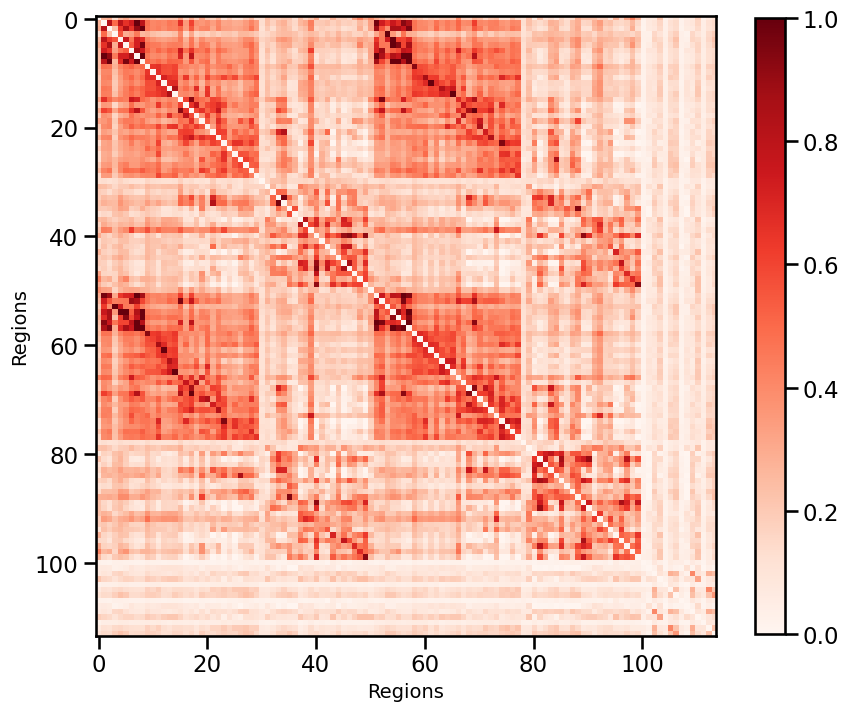

In [11]:
Y_fc = load_connectome(measure='FC', omit_subcortical=False)
plot_connectome(Y_fc)

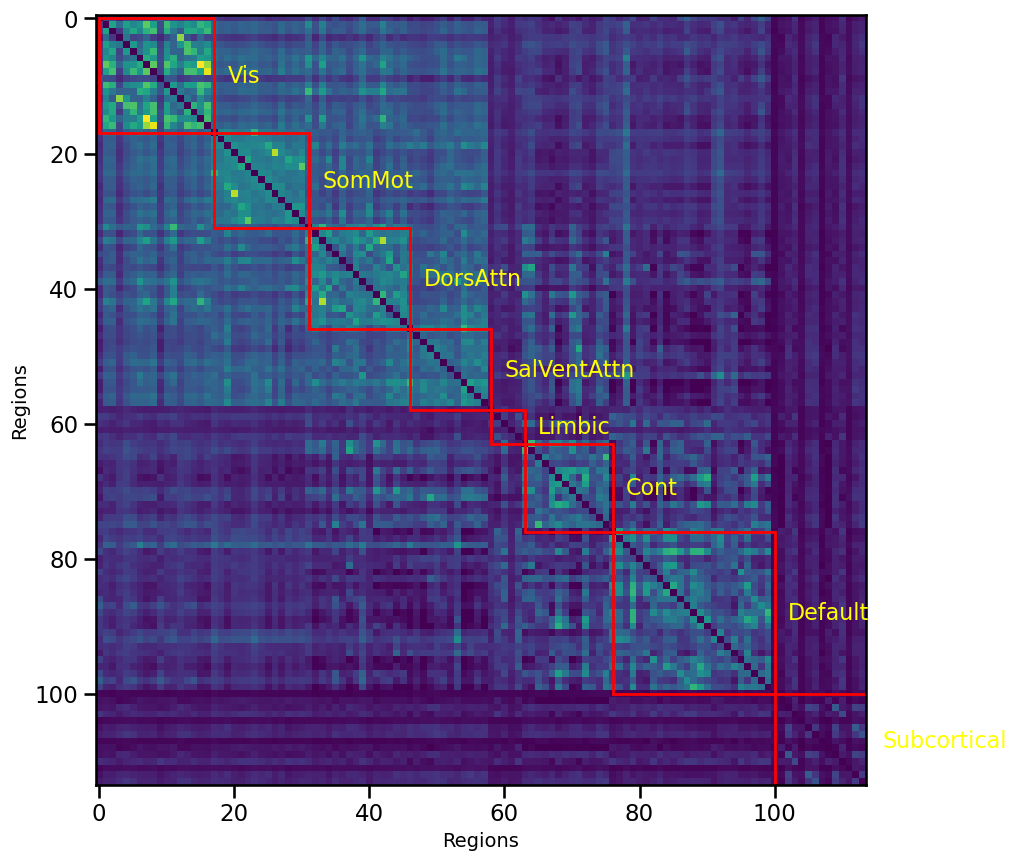

In [12]:
plot_connectome_with_labels(Y_fc, fc_combined_labels_schaef_100)


#### Louvain community detection

Graph with 114 nodes and 6441 edges
[{1, 2, 66, 4, 5, 6, 69, 8, 7, 3, 15, 17, 51, 52, 53, 54, 55, 56, 57}, {0, 30, 31, 32, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 78, 79, 81, 82, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113}, {64, 65, 67, 9, 10, 11, 12, 13, 14, 18, 20, 101, 108, 58, 59, 60, 61, 62, 63}, {68, 70, 71, 72, 73, 74, 75, 76, 77, 16, 80, 19, 83, 21, 22, 23, 24, 25, 26, 27, 28, 29, 87, 33, 34, 39, 84}]


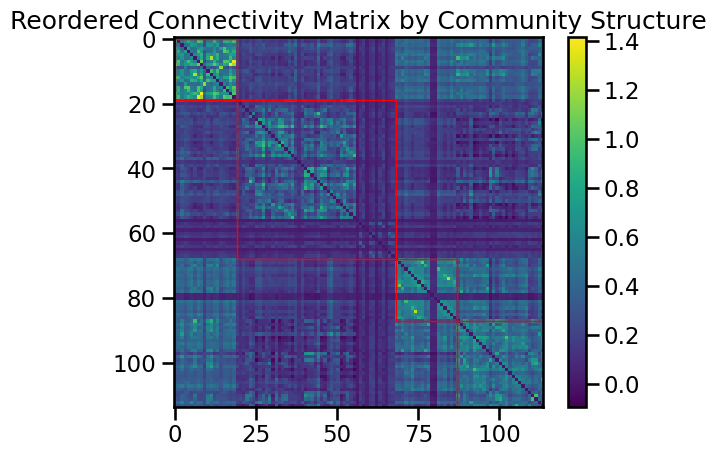

In [13]:
Y = load_connectome()
connectome_net = nx.Graph(incoming_graph_data=Y)
print(connectome_net)

# resolution parameter should be maximized until an inner train is infeasible/impractical to evaluate (1.1 could technically work)
communities = nx.community.louvain_communities(connectome_net, seed=2, resolution=1.01)
print(communities)

# Create a new ordering of nodes based on louvain community detection
new_order = []
for community in communities:
    new_order.extend(community)

# Map the original indices to the new ordering
index_map = {old_idx: new_idx for new_idx, old_idx in enumerate(new_order)}

# Reorder the matrix
Y_reordered = Y[np.ix_(new_order, new_order)]

# Visualize the reordered matrix
fig, ax = plt.subplots()
cax = ax.imshow(Y_reordered, cmap='viridis')

# Add colorbar
plt.colorbar(cax)

# Add red boxes around communities
start = 0
for community in communities:
    size = len(community)
    rect = patches.Rectangle((start, start), size, size, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    start += size

plt.title('Reordered Connectivity Matrix by Community Structure')
plt.show()

#### HCP connectomes in replication dataset space

#### GTEx-space connectome

In [10]:
gtex_transcriptome = load_transcriptome(dataset='GTEx')
gtex_connectome = load_connectome(dataset='GTEx')

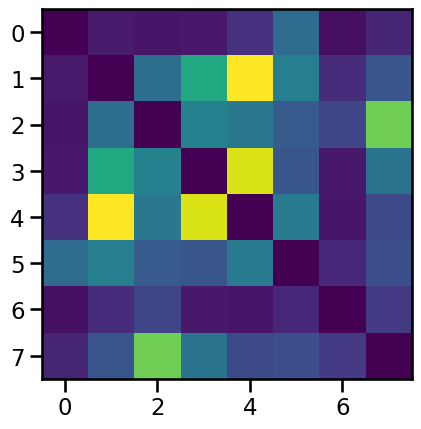

In [11]:
plt.imshow(gtex_connectome)

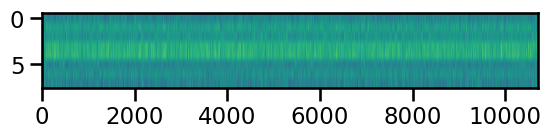

In [12]:
plt.imshow(gtex_transcriptome, aspect=200)

##### UTSW-space connectome

In [13]:
utsw_transcriptome = load_transcriptome(dataset='UTSW')
utsw_connectome = load_connectome(dataset='UTSW')

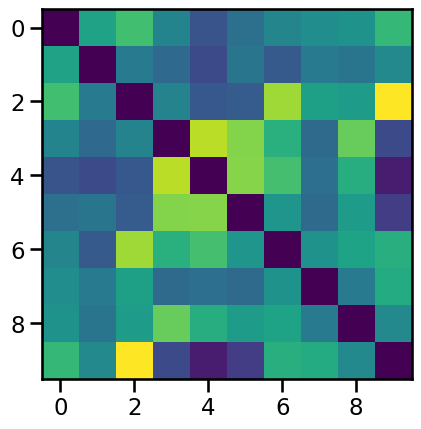

In [14]:
plt.imshow(utsw_connectome)

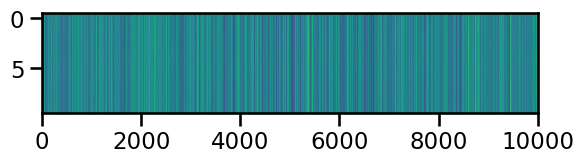

In [15]:
plt.imshow(utsw_transcriptome, aspect=200)

### AHBA gene data

In [16]:
genes = fetch_ahba()
genes

label      A1BG  A1BG-AS1      AAAS      AACS  \
0                  L_bankssts  0.468854  0.700170  0.505789  0.764127   
1   L_caudalanteriorcingulate  0.606901  0.560731  0.459692  0.673249   
2       L_caudalmiddlefrontal  0.512080  0.609772  0.516944  0.791223   
3                    L_cuneus  0.340848  0.570180  0.677448  0.750356   
4                L_entorhinal  0.663801  0.549562  0.395052  0.721829   
..                        ...       ...       ...       ...       ...   
77                      Rcaud  0.619848  0.318972  0.498983  0.271222   
78                     Rhippo  0.377399  0.274101  0.347923  0.523755   
79                       Rpal  0.800714  0.220463  0.635593  0.197948   
80                       Rput  0.697285  0.447848  0.514870  0.367506   
81                      Rthal  0.394455  0.225060  0.499385  0.365251   

     AADACL3     AADAT     AAED1      AAK1     AAMDC  ...    ZSWIM9      ZW10  \
0   0.374206  0.658622  0.345665  0.511831  0.424702  ...  0.578213  0.539968   
1   0.424793  0.709927  0.441996  0.366110  0.603905  ...  0.736780  0.471864   
2   0.368258  0.591441  0.440311  0.520090  0.494193  ...  0.568923  0.522407   
3   0.442332  0.569819  0.364639  0.666202  0.429725  ...  0.328457  0.589241   
4   0.449548  0.588481  0.576347  0.347882  0.548371  ...  0.702060  0.479673   
..       ...       ...       ...       ...       ...  ...       ...       ...   
77  0.555309  0.500222  0.663142  0.330626  0.720306  ...  0.812634  0.332516   
78  0.718340  0.228699  0.565169  0.739631  0.258704  ...  0.328818  0.359226   
79  0.548496  0.624486  0.664744  0.221901  0.937931  ...  0.482249  0.644349   
80  0.406484  0.595085  0.469804  0.212579  0.670761  ...  0.794397  0.419572   
81  0.620762  0.351314  0.522356  0.661999  0.695388  ...  0.394665  0.475359   

      ZWILCH     ZWINT      ZXDA      ZXDC    ZYG11B       ZYX     ZZEF1  \
0   0.542518  0.580108  0.436774  0.342712  0.690473  0.700179  0.533907   
1   0.441377  0.406806  0.458666  0.486808  0.624359  0.496063  0.427907   
2   0.595659  0.471493  0.366045  0.356483  0.689424  0.731162  0.367931   
3   0.562006  0.451543  0.403732  0.370707  0.646500  0.859074  0.568544   
4   0.546094  0.691197  0.360518  0.526293  0.706851  0.333083  0.345136   
..       ...       ...       ...       ...       ...       ...       ...   
77  0.302927  0.370860  0.751410  0.699088  0.275580  0.224110  0.339080   
78  0.368190  0.651293  0.645399  0.554279  0.376828  0.285925  0.485843   
79  0.273982  0.329791  0.568571  0.801305  0.258434  0.430613  0.565564   
80  0.480628  0.464933  0.689909  0.636104  0.320400  0.349777  0.534618   
81  0.237972  0.514387  0.499345  0.543173  0.431658  0.365695  0.477050   

        ZZZ3  
0   0.482430  
1   0.510274  
2   0.461228  
3   0.369236  
4   0.557094  
..       ...  
77  0.420971  
78  0.412266  
79  0.785757  
80  0.601170  
81  0.543265  

[82 rows x 12669 columns]

In [17]:
X = load_transcriptome(omit_subcortical=False)

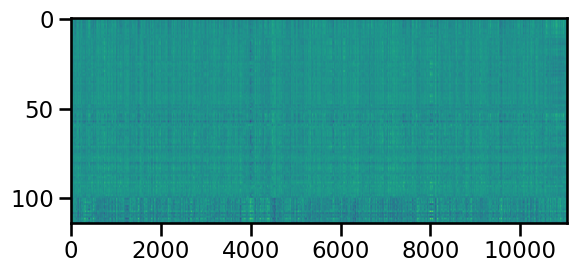

In [18]:
plt.imshow(X, aspect=40)

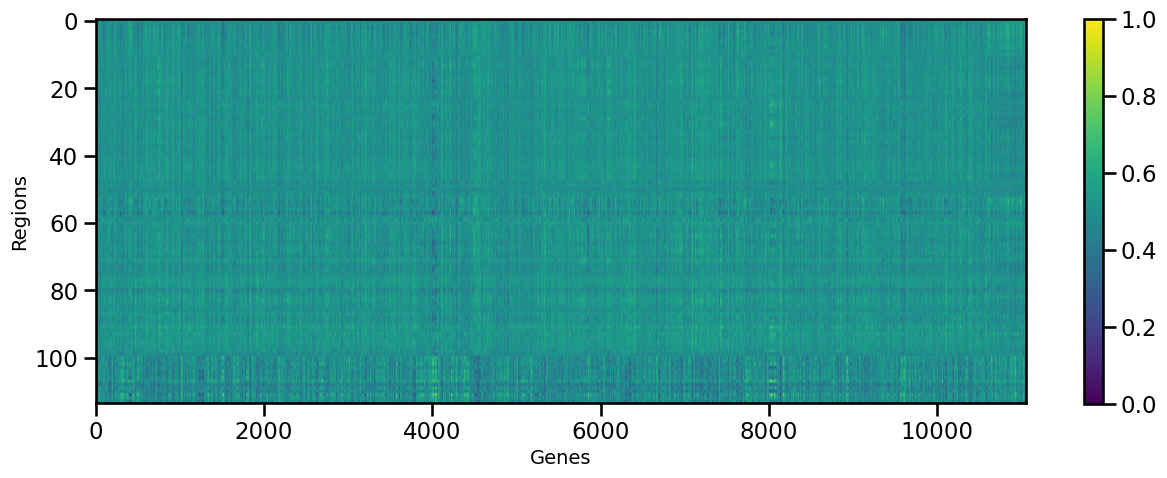

In [19]:
plot_transcriptome(X)

#### Visualize transcriptome-transcriptome spatial heatmap

(114, 114)


<Axes: >

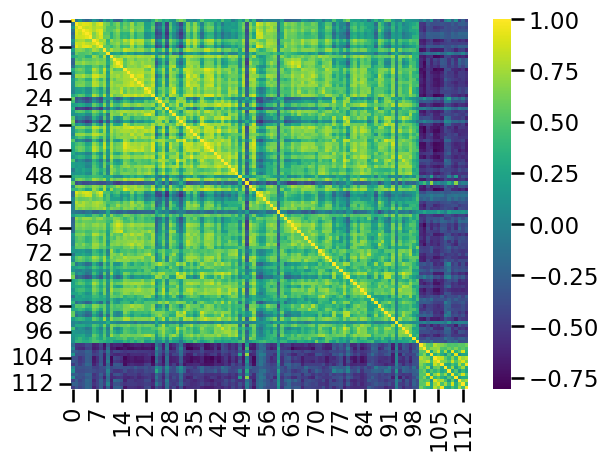

In [20]:
# compute region-region correlations for schaefer 100 parcellation
# label is considered our variables and each gene is an observation 
# this will result in a 114x114 regional gene correlation matrix of AHBA
X_df = pd.DataFrame(X)

schaefer_genes_region_corr = X_df.T.corr(method = 'pearson', numeric_only = False)
print(schaefer_genes_region_corr.shape)
sns.heatmap(schaefer_genes_region_corr, cmap = 'viridis')

<Axes: >

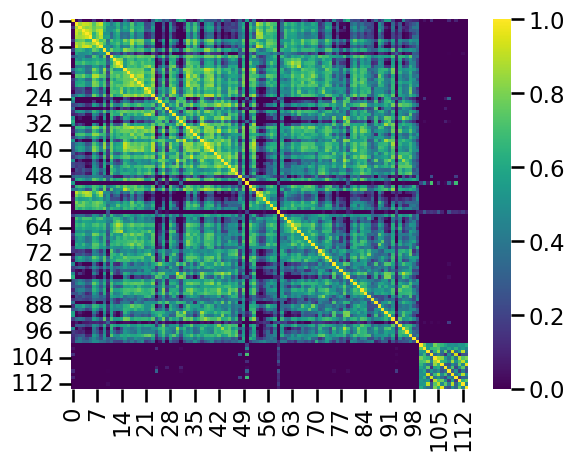

In [21]:
# Plot the heatmap with the updated correlation matrix
sns.heatmap(schaefer_genes_region_corr, cmap='viridis', vmin=0)

#### Correlate transcriptome-fMRI

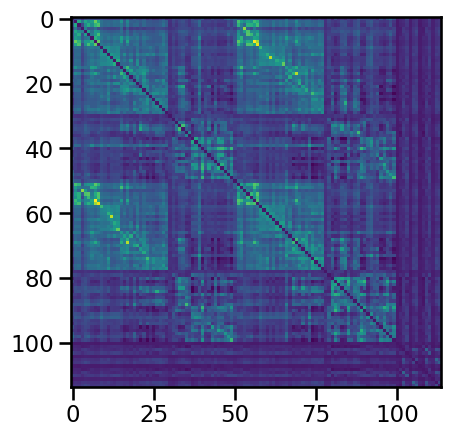

In [22]:
plt.imshow(Y_fc)

In [23]:
# Replace negative values with 0 in the correlation matrix
# schaefer_genes_region_corr[schaefer_genes_region_corr < 0] = 0

# Flatten both matrices to compute the total correlation
schaefer_genes_region_corr_flat = schaefer_genes_region_corr.values.flatten()  # if it's a pandas DataFrame
Y_flat = Y.flatten()  # Assuming Y is a numpy array

# Compute Pearson correlation between the flattened matrices
total_correlation = np.corrcoef(schaefer_genes_region_corr_flat, Y_flat)[0, 1]

# Print the total correlation value
print(f"Total Pearson correlation between the thresholded heatmap and true connectome: {total_correlation}")


Total Pearson correlation between the thresholded heatmap and true connectome: 0.44635179977766054


### DTI

(114, 114)


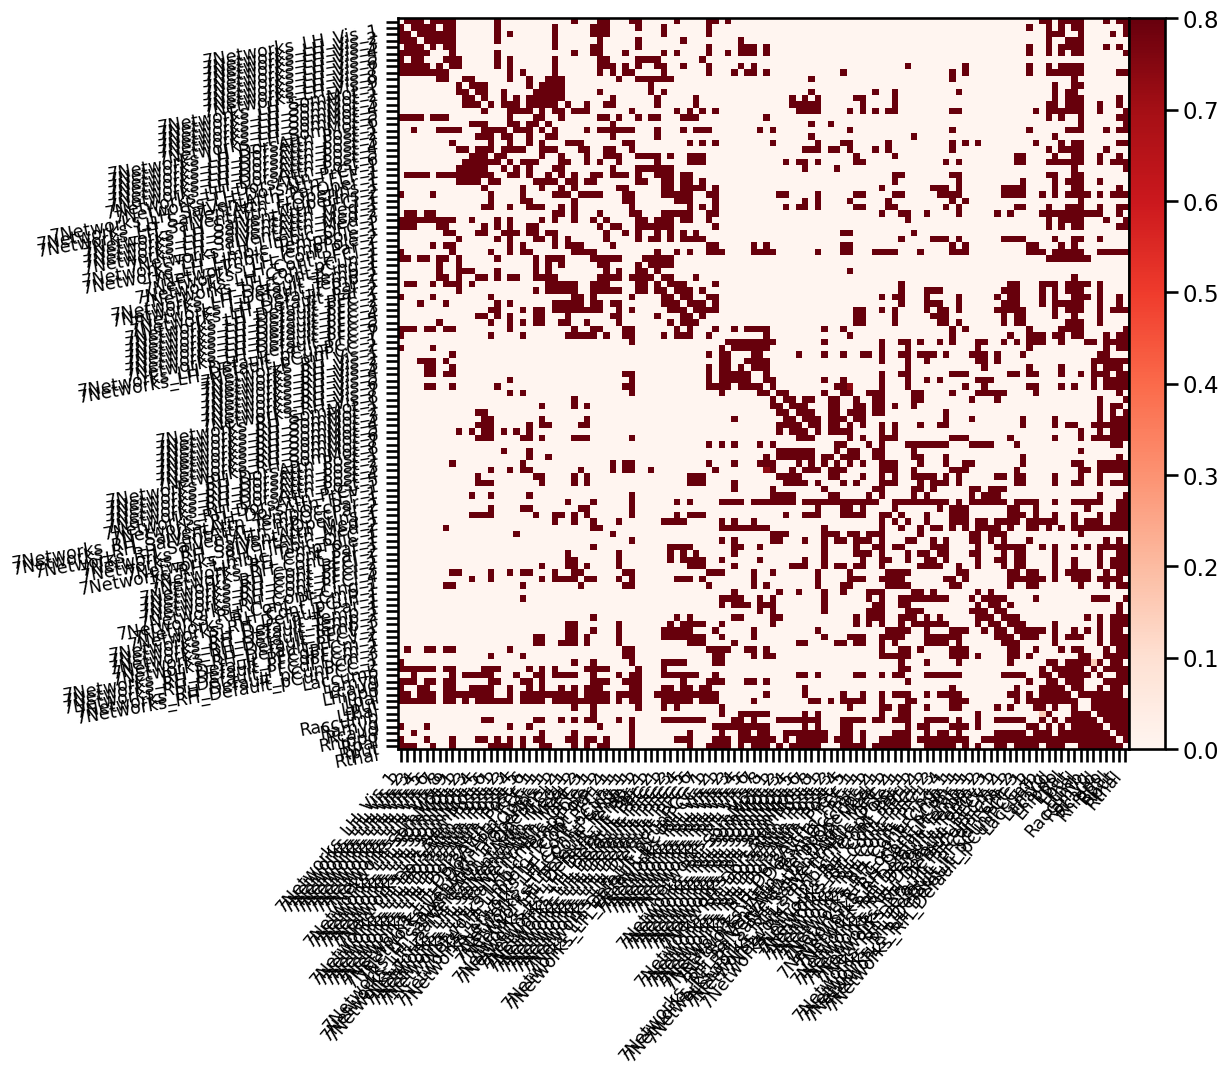

In [24]:
sc_combined_mat_schaef_100, sc_combined_labels_schaef_100 = load_sc_as_one(parcellation='schaefer_100')
print(sc_combined_mat_schaef_100.shape)
sc_all_schaef = plotting.plot_matrix(sc_combined_mat_schaef_100, figure=(9, 9), labels=sc_combined_labels_schaef_100, vmax=0.8, vmin=0, cmap='Reds')

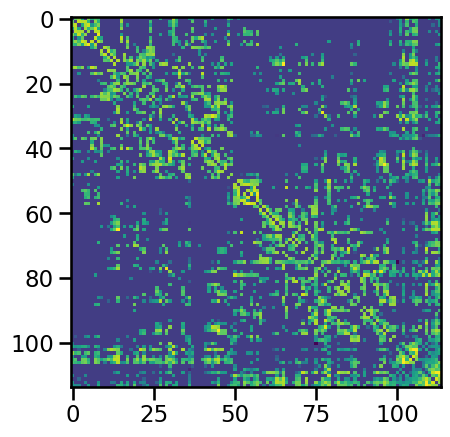

In [25]:
Y_sc = load_connectome(measure='SC', omit_subcortical=False)
plt.imshow(Y_sc)

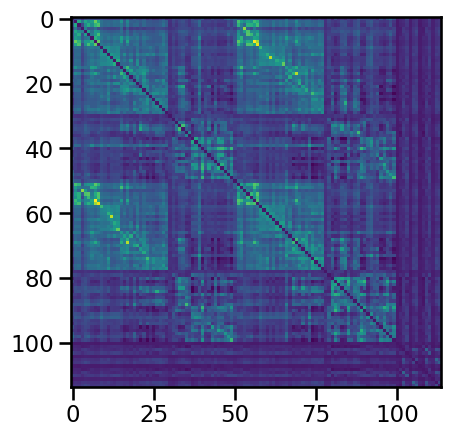

In [26]:
plt.imshow(Y_fc)

#### Correlate DTI-fMRI

In [27]:
# Flatten both matrices to compute the total correlation

Y_sc = Y_sc.flatten()  # if it's a pandas DataFrame
Y_flat = Y_fc.flatten()  # Assuming Y is a numpy array

# Compute Pearson correlation between the flattened matrices
total_correlation = np.corrcoef(Y_sc, Y_flat)[0, 1]

# Print the total correlation value
print(f"Total Pearson correlation between the thresholded heatmap and true connectome: {total_correlation}")


Total Pearson correlation between the thresholded heatmap and true connectome: 0.17274458597319897


### Distance

In [28]:
# Extract the coordinates from the DataFrame
coordinates = load_coords()

# Compute pairwise Euclidean distances
distance = squareform(pdist(coordinates, metric='euclidean'))

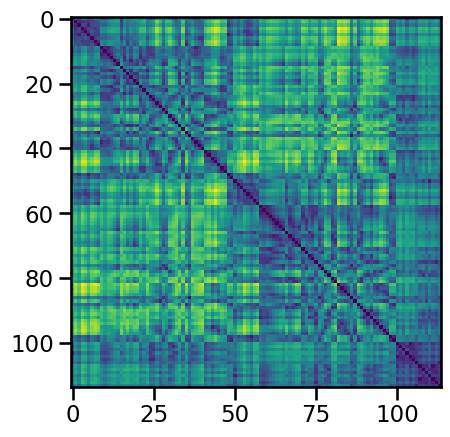

In [29]:
plt.imshow(distance)

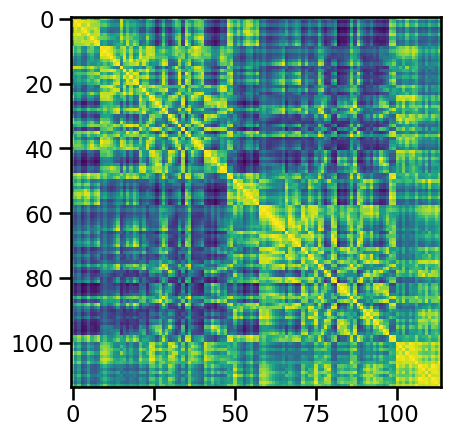

In [30]:
plt.imshow(np.exp((-distance**2)/10**4))

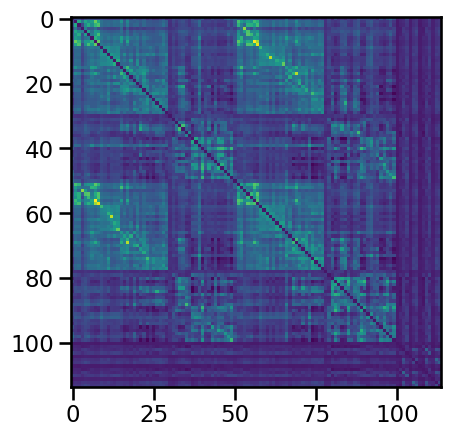

In [31]:
plt.imshow(Y_fc)

#### Correlate distance-fMRI

In [32]:
# Flatten both matrices to compute the total correlation
distance = distance.flatten()  # if it's a pandas DataFrame
Y_flat = Y_fc.flatten()  # Assuming Y is a numpy array

# Compute Pearson correlation between the flattened matrices
total_correlation = np.corrcoef(distance, Y_flat)[0, 1]

# Print the total correlation value
print(f"Total Pearson correlation between the thresholded heatmap and true connectome: {total_correlation}")


Total Pearson correlation between the thresholded heatmap and true connectome: -0.0839242094073291


### UMAP for edge connections

In [33]:
# first assign macro region in schaefer114.csv
relative_data_path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = par_dir + '/data'
schaef_df = pd.read_csv(relative_data_path + '/data/atlas_info/schaef114.csv')    
schaef_df

Unnamed: 0             label_x  index   label_y network_label  \
0             0  7Networks_LH_Vis_1    1.0  LH_Vis_1           Vis   
1             1  7Networks_LH_Vis_2    2.0  LH_Vis_2           Vis   
2             2  7Networks_LH_Vis_3    3.0  LH_Vis_3           Vis   
3             3  7Networks_LH_Vis_4    4.0  LH_Vis_4           Vis   
4             4  7Networks_LH_Vis_5    5.0  LH_Vis_5           Vis   
..          ...                 ...    ...       ...           ...   
109         109               Rcaud    NaN       NaN     Subcortex   
110         110              Rhippo    NaN       NaN     Subcortex   
111         111                Rpal    NaN       NaN     Subcortex   
112         112                Rput    NaN       NaN     Subcortex   
113         113               Rthal    NaN       NaN     Subcortex   

         label_7network  index_17network                   label_17network  \
0    7Networks_LH_Vis_1             49.0      17Networks_LH_DefaultC_PHC_1   
1    7Networks_LH_Vis_2              1.0     17Networks_LH_VisCent_ExStr_1   
2    7Networks_LH_Vis_3              5.0  17Networks_LH_VisPeri_ExStrInf_1   
3    7Networks_LH_Vis_4              2.0     17Networks_LH_VisCent_ExStr_2   
4    7Networks_LH_Vis_5              3.0   17Networks_LH_VisCent_Striate_1   
..                  ...              ...                               ...   
109                 NaN              NaN                               NaN   
110                 NaN              NaN                               NaN   
111                 NaN              NaN                               NaN   
112                 NaN              NaN                               NaN   
113                 NaN              NaN                               NaN   

    network_label_17network atlas_name  network_id   id hemisphere  structure  \
0                  DefaultC      4S156         NaN  1.0          L     cortex   
1                   VisCent      4S156         NaN  2.0          L     cortex   
2                   VisPeri      4S156         NaN  3.0          L     cortex   
3                   VisCent      4S156         NaN  4.0          L     cortex   
4                   VisCent      4S156         NaN  5.0          L     cortex   
..                      ...        ...         ...  ...        ...        ...   
109                     NaN        NaN         NaN  NaN          R  subcortex   
110                     NaN        NaN         NaN  NaN          R  subcortex   
111                     NaN        NaN         NaN  NaN          R  subcortex   
112                     NaN        NaN         NaN  NaN          R  subcortex   
113                     NaN        NaN         NaN  NaN          R  subcortex   

         mni_x      mni_y      mni_z  
0   -25.819797 -32.624365 -17.459391  
1   -25.481288 -76.591819 -13.514360  
2   -16.424947 -60.957717  -6.735729  
3   -27.130818 -94.490566  -4.744654  
4    -6.226506 -92.462651  -3.036145  
..         ...        ...        ...  
109  14.720000   7.160000   9.640000  
110  26.370000 -21.140000 -13.890000  
111  12.420000   3.790000  -8.420000  
112  25.880000   1.930000   0.600000  
113   6.020000 -14.840000   2.840000  

[114 rows x 17 columns]

In [34]:
import nibabel as nib
import numpy as np
import pandas as pd
from collections import Counter

# List of regions to be labeled as 'Subcortical Microstructure'
subcortical_microstructure_regions = [
    'LH-GPe', 'LH-GPi', 'LH-VeP', 'LH-HTH', 'LH-SNc_PBP_VTA', 'LH-RN', 'LH-SNr',
    'RH-GPe', 'RH-GPi', 'RH-RN', 'RH-SNr', 'RH-HTH', 'RH-MN', 'RH-SNc_PBP_VTA',
    'Hypothalamus', 'Substantia nigra', 'Globus Pallidus', 'Internal Capsule', 'Substantia Nigra'
]

# Load the MNI nifti file and extract data
def load_mni_atlas(atlas_path):
    """
    Load the MNI atlas using nibabel and return the data and affine matrix.
    """
    mni_img = nib.load(atlas_path)
    mni_data = mni_img.get_fdata()
    affine = mni_img.affine
    return mni_data, affine

# Function to map MNI region from coordinates
def get_mni_region_from_coords(coords, mni_data, affine, mni_label_map):
    """
    Given a list of coordinates, determine the most frequent MNI macro region.
    If no match is found, return 'Unknown'.
    
    Args:
        coords (tuple): A tuple of 3D MNI coordinates (mni_x, mni_y, mni_z).
        mni_data (numpy array): The loaded MNI atlas data.
        affine (numpy array): Affine transformation matrix from the NIfTI file.
        mni_label_map (dict): Dictionary mapping MNI ROI values to labels.

    Returns:
        str: Most frequent MNI region label or 'Unknown'.
    """
    regions = []
    
    # Transform MNI coordinates to voxel indices using the affine
    voxel_coord = nib.affines.apply_affine(np.linalg.inv(affine), coords)
    voxel_coord = np.round(voxel_coord).astype(int)

    # Ensure the voxel coordinates are within the MNI data bounds
    if (0 <= voxel_coord[0] < mni_data.shape[0] and
        0 <= voxel_coord[1] < mni_data.shape[1] and
        0 <= voxel_coord[2] < mni_data.shape[2]):
        region_value = mni_data[tuple(voxel_coord)]
        region_label = mni_label_map.get(int(region_value), None)
        
        # If a region label is found in the MNI data, add it
        if region_label:
            regions.append(region_label)

    if regions:
        most_common_region = Counter(regions).most_common(1)[0][0]
        return most_common_region
    else:
        return 'Unknown'

# Function to assign macro regions based on MNI coordinates (mni_x, mni_y, mni_z)
def assign_macro_regions_from_mni_coords(df, mni_data, affine, mni_label_map):
    """
    Assign a macro brain region to each sample based on MNI coordinates.
    
    Args:
        df (pd.DataFrame): DataFrame containing the MNI coordinates ('mni_x', 'mni_y', 'mni_z').
        mni_data (numpy array): The loaded MNI atlas data.
        affine (numpy array): Affine transformation matrix from the NIfTI file.
        mni_label_map (dict): Dictionary mapping MNI ROI values to labels.
        
    Returns:
        pd.DataFrame: Updated DataFrame with the macro region column added.
    """
    # List to store the macro regions
    macro_regions = []

    # Iterate over each row in the DataFrame
    for idx, row in df.iterrows():
        # Extract the MNI coordinates
        coords = (row['mni_x'], row['mni_y'], row['mni_z'])
        
       
        macro_region = get_mni_region_from_coords(coords, mni_data, affine, mni_label_map)
        macro_regions.append(macro_region)

    # Add the new 'macro region' column to the DataFrame
    df['macro_region'] = macro_regions
    
    return df

# Sample usage
mni_nifti_path = data_dir+'/atlas_info/MNI-maxprob-thr0-1mm.nii'

# Load the MNI atlas
mni_data, affine = load_mni_atlas(mni_nifti_path)

# Define the MNI region label map (replace with your actual labels from the MNI.xml or other source)
mni_label_map = {
    1: 'Caudate',
    2: 'Cerebellum',
    3: 'Frontal Lobe',
    4: 'Insula',
    5: 'Occipital Lobe',
    6: 'Parietal Lobe',
    7: 'Putamen',
    8: 'Temporal Lobe',
    9: 'Thalamus'
}

# Assign macro regions to the schaef_df based on MNI coordinates
schaef_df = assign_macro_regions_from_mni_coords(schaef_df, mni_data, affine, mni_label_map)

# Display the updated DataFrame with the new 'macro_region' column
print(schaef_df[['mni_x', 'mni_y', 'mni_z', 'macro_region']].head())

       mni_x      mni_y      mni_z    macro_region
0 -25.819797 -32.624365 -17.459391   Temporal Lobe
1 -25.481288 -76.591819 -13.514360  Occipital Lobe
2 -16.424947 -60.957717  -6.735729  Occipital Lobe
3 -27.130818 -94.490566  -4.744654  Occipital Lobe
4  -6.226506 -92.462651  -3.036145  Occipital Lobe


In [35]:
schaef_df

Unnamed: 0             label_x  index   label_y network_label  \
0             0  7Networks_LH_Vis_1    1.0  LH_Vis_1           Vis   
1             1  7Networks_LH_Vis_2    2.0  LH_Vis_2           Vis   
2             2  7Networks_LH_Vis_3    3.0  LH_Vis_3           Vis   
3             3  7Networks_LH_Vis_4    4.0  LH_Vis_4           Vis   
4             4  7Networks_LH_Vis_5    5.0  LH_Vis_5           Vis   
..          ...                 ...    ...       ...           ...   
109         109               Rcaud    NaN       NaN     Subcortex   
110         110              Rhippo    NaN       NaN     Subcortex   
111         111                Rpal    NaN       NaN     Subcortex   
112         112                Rput    NaN       NaN     Subcortex   
113         113               Rthal    NaN       NaN     Subcortex   

         label_7network  index_17network                   label_17network  \
0    7Networks_LH_Vis_1             49.0      17Networks_LH_DefaultC_PHC_1   
1    7Networks_LH_Vis_2              1.0     17Networks_LH_VisCent_ExStr_1   
2    7Networks_LH_Vis_3              5.0  17Networks_LH_VisPeri_ExStrInf_1   
3    7Networks_LH_Vis_4              2.0     17Networks_LH_VisCent_ExStr_2   
4    7Networks_LH_Vis_5              3.0   17Networks_LH_VisCent_Striate_1   
..                  ...              ...                               ...   
109                 NaN              NaN                               NaN   
110                 NaN              NaN                               NaN   
111                 NaN              NaN                               NaN   
112                 NaN              NaN                               NaN   
113                 NaN              NaN                               NaN   

    network_label_17network atlas_name  network_id   id hemisphere  structure  \
0                  DefaultC      4S156         NaN  1.0          L     cortex   
1                   VisCent      4S156         NaN  2.0          L     cortex   
2                   VisPeri      4S156         NaN  3.0          L     cortex   
3                   VisCent      4S156         NaN  4.0          L     cortex   
4                   VisCent      4S156         NaN  5.0          L     cortex   
..                      ...        ...         ...  ...        ...        ...   
109                     NaN        NaN         NaN  NaN          R  subcortex   
110                     NaN        NaN         NaN  NaN          R  subcortex   
111                     NaN        NaN         NaN  NaN          R  subcortex   
112                     NaN        NaN         NaN  NaN          R  subcortex   
113                     NaN        NaN         NaN  NaN          R  subcortex   

         mni_x      mni_y      mni_z    macro_region  
0   -25.819797 -32.624365 -17.459391   Temporal Lobe  
1   -25.481288 -76.591819 -13.514360  Occipital Lobe  
2   -16.424947 -60.957717  -6.735729  Occipital Lobe  
3   -27.130818 -94.490566  -4.744654  Occipital Lobe  
4    -6.226506 -92.462651  -3.036145  Occipital Lobe  
..         ...        ...        ...             ...  
109  14.720000   7.160000   9.640000         Caudate  
110  26.370000 -21.140000 -13.890000   Temporal Lobe  
111  12.420000   3.790000  -8.420000         Unknown  
112  25.880000   1.930000   0.600000         Putamen  
113   6.020000 -14.840000   2.840000        Thalamus  

[114 rows x 18 columns]

In [36]:
# want to run umap on the different node-node feature types and see if any structure emerges
X = load_transcriptome()
Y = load_connectome(measure='FC')
X_pca = load_transcriptome(run_PCA=True)
Y_sc = load_connectome(measure='SC')
coords = load_coords()


# Print the shapes of each matrix
print(f"Shape of Transcriptome Data (X): {X.shape}")
print(f"Shape of Functional Connectome Data (Y - FC): {Y.shape}")
print(f"Shape of Transcriptome Data after PCA (X_pca): {X_pca.shape}")
print(f"Shape of Structural Connectome Data (Y - SC): {Y_sc.shape}")
print(f"Shape of Coordinates Data (coords): {coords.shape}")

Number of components explaining 95.0% of the variance: 34
Shape of Transcriptome Data (X): (114, 11053)
Shape of Functional Connectome Data (Y - FC): (114, 114)
Shape of Transcriptome Data after PCA (X_pca): (114, 34)
Shape of Structural Connectome Data (Y - SC): (114, 114)
Shape of Coordinates Data (coords): (114, 3)


In [37]:
# Expand each matrix using the expand_X_symmetric function
expanded_X = expand_X_symmetric(X)
expanded_Y_fc = expand_X_symmetric(Y)  # Functional Connectome
expanded_X_pca = expand_X_symmetric(X_pca)
expanded_Y_sc = expand_X_symmetric(Y_sc)  # Structural Connectome
expanded_coords = expand_X_symmetric(coords)  # Coordinates (if applicable)

# Print the shapes of each expanded matrix
print(f"Shape of Expanded Transcriptome Data (X): {expanded_X.shape}")
print(f"Shape of Expanded Functional Connectome Data (Y - FC): {expanded_Y_fc.shape}")
print(f"Shape of Expanded Transcriptome Data after PCA (X_pca): {expanded_X_pca.shape}")
print(f"Shape of Expanded Structural Connectome Data (Y - SC): {expanded_Y_sc.shape}")
print(f"Shape of Expanded Coordinates (Coords): {expanded_coords.shape}")

Shape of Expanded Transcriptome Data (X): (12882, 22106)
Shape of Expanded Functional Connectome Data (Y - FC): (12882, 228)
Shape of Expanded Transcriptome Data after PCA (X_pca): (12882, 68)
Shape of Expanded Structural Connectome Data (Y - SC): (12882, 228)
Shape of Expanded Coordinates (Coords): (12882, 6)


In [46]:
def create_edge_labels(schaef_df):
    """
    Creates edge label columns based on macro regions and 7-network labels.
    For each region-region connection, it assigns:
    1. A macro-region to macro-region label.
    2. A label_7network to label_7network label.
    
    Returns two columns:
    - Macro-region connection labels (source-target/target-source).
    - Network connection labels (source-target/target-source).
    The output will have the same row dimensionality as the expanded matrices.
    """
    num_regions = schaef_df.shape[0]
    region_combinations = list(combinations(range(num_regions), 2))
    num_combinations = len(region_combinations)

    macro_region_labels = []
    network_labels = []

    for region1, region2 in region_combinations:
        # Get macro-region labels for the two regions
        macro_region_1 = schaef_df.loc[region1, 'macro_region']
        macro_region_2 = schaef_df.loc[region2, 'macro_region']
        
        # Replace 'Unknown' with 'Pallidum' in macro region labels
        if macro_region_1 == 'Unknown':
            macro_region_1 = 'Pallidum'
        if macro_region_2 == 'Unknown':
            macro_region_2 = 'Pallidum'
            
        # Get network labels for the two regions
        network_1 = schaef_df.loc[region1, 'network_label']
        network_2 = schaef_df.loc[region2, 'network_label']
        
        # Create both source-target and target-source labels for each pair
        macro_region_labels.append(f"{macro_region_1}-{macro_region_2}")
        macro_region_labels.append(f"{macro_region_2}-{macro_region_1}")
        
        network_labels.append(f"{network_1}-{network_2}")
        network_labels.append(f"{network_2}-{network_1}")

    # Convert lists to numpy arrays with correct dimensionality
    macro_region_labels = np.array(macro_region_labels).reshape((num_combinations * 2, 1))
    network_labels = np.array(network_labels).reshape((num_combinations * 2, 1))

    return macro_region_labels, network_labels

# Assuming 'schaef_df' is already loaded and contains the necessary region information
macro_region_edge_labels, network_edge_labels = create_edge_labels(schaef_df)

# Print the shapes of the labels to verify
print(f"Shape of Macro-Region Labels: {macro_region_edge_labels.shape}")
print(f"Shape of Network Labels: {network_edge_labels.shape}")

# Check how many unique edge labels there are for macro regions
unique_macro_region_labels = np.unique(macro_region_edge_labels)
num_unique_macro_region_labels = len(unique_macro_region_labels)

# Check how many unique edge labels there are for networks
unique_network_labels = np.unique(network_edge_labels)
num_unique_network_labels = len(unique_network_labels)

# Print the results
print(f"Number of unique macro region edge labels: {num_unique_macro_region_labels}")
print(f"Number of unique network edge labels: {num_unique_network_labels}")

Shape of Macro-Region Labels: (12882, 1)
Shape of Network Labels: (12882, 1)
Number of unique macro region edge labels: 81
Number of unique network edge labels: 64


In [47]:
def expand_X_symmetric_subset(X, schaef_df):
    """
    Expands the X matrix symmetrically by combining gene expressions from pairs of regions,
    and subsets to only the roi1->roi2 direction.

    Parameters:
    X (numpy.ndarray): Input matrix of gene expressions.
    schaef_df (pandas.DataFrame): Schaef dataframe containing region metadata.

    Returns:
    expanded_X_subset (numpy.ndarray): Expanded matrix for roi1->roi2 direction only.
    macro_region_labels_subset (list): Macro-region edge labels for roi1->roi2.
    network_labels_subset (list): Network edge labels for roi1->roi2.
    """
    num_regions, num_genes = X.shape
    region_combinations = list(combinations(range(num_regions), 2))
    num_combinations = len(region_combinations)

    # Subset every other combination for roi1->roi2
    expanded_X_subset = np.zeros((num_combinations, 2 * num_genes))
    macro_region_labels_subset = []
    network_labels_subset = []

    for i, (region1, region2) in enumerate(region_combinations):
        # Concatenate region1 and region2 gene expression for roi1->roi2 direction
        expanded_X_subset[i] = np.concatenate((X[region1], X[region2]))
        
        # Create macro-region to macro-region label
        macro_region1 = schaef_df.iloc[region1]['macro_region']
        macro_region2 = schaef_df.iloc[region2]['macro_region']

        # Replace 'Unknown' with 'Pallidum'
        if macro_region1 == 'Unknown':
            macro_region1 = 'Pallidum'
        if macro_region2 == 'Unknown':
            macro_region2 = 'Pallidum'

        macro_region_label = f"{macro_region1}-{macro_region2}"
        macro_region_labels_subset.append(macro_region_label)

        # Create network to network label
        network1 = schaef_df.iloc[region1]['network_label']
        network2 = schaef_df.iloc[region2]['network_label']
        network_label = f"{network1}-{network2}"
        network_labels_subset.append(network_label)

    return expanded_X_subset, macro_region_labels_subset, network_labels_subset

In [53]:
# Assuming you have loaded X and schaef_df
X_subset, macro_region_edge_labels_subset, network_edge_labels_subset = expand_X_symmetric_subset(X, schaef_df)

# Print out shapes and first few labels for verification
print(f"Shape of subsetted expanded matrix (roi1->roi2): {X_subset.shape}")
print(f"Number of macro-region labels: {len(macro_region_edge_labels_subset)}")
print(f"Number of network labels: {len(network_edge_labels_subset)}")

# Using numpy to find unique labels
unique_macro_region_labels = set(macro_region_edge_labels_subset)
unique_network_labels = set(network_edge_labels_subset)
print(f"Number of unique macro-region labels: {len(unique_macro_region_labels)}")
print(f"Number of unique network labels: {len(unique_network_labels)}")

Shape of subsetted expanded matrix (roi1->roi2): (6441, 22106)
Number of macro-region labels: 6441
Number of network labels: 6441
Number of unique macro-region labels: 65
Number of unique network labels: 57


In [68]:

def plot_umap_with_labels(X_subset, edge_labels, title="UMAP Plot", label_name="edge_label", color_discrete_sequence=None):
    """
    Generates a 2D UMAP plot with hover information based on edge labels.
    The plot is adjusted to be more square with smaller nodes and a gradient color map.

    Parameters:
    - X_subset: The subsetted input matrix (e.g. gene expression or connectivity matrix)
    - edge_labels: The list of edge labels corresponding to each row in X_subset (e.g. macro-region or network labels)
    - title: Title of the UMAP plot
    - label_name: Name of the label to be used in hover information (e.g. 'macro-region', 'network')
    - gradient_colors: List of colors to use for the gradient (e.g. ['blue', 'green', 'yellow']). If None, defaults to a 3-color gradient.
    """
    # Step 1: Run UMAP to reduce X_subset to 2D
    umap_model = umap.UMAP(n_components=2, random_state=42)
    umap_embedding = umap_model.fit_transform(X_subset)

    # Step 2: Prepare data for Plotly
    # Convert the UMAP embedding and labels into a DataFrame for Plotly
    umap_df = pd.DataFrame(umap_embedding, columns=['UMAP_1', 'UMAP_2'])
    umap_df[label_name] = edge_labels

    # Step 3: Plot the UMAP using Plotly Express with hover information
    if color_discrete_sequence is None:
        color_discrete_sequence = px.colors.qualitative.Set3  # Default Plotly qualitative colors

    fig = px.scatter(
        umap_df, 
        x='UMAP_1', y='UMAP_2', 
        color=label_name, 
        labels={label_name: label_name},
        hover_data={label_name: True},  # Include the label in hover information
        title=title,
        color_discrete_sequence=color_discrete_sequence  # Use discrete color scale for categorical data
    )
    
    fig.update_traces(marker=dict(size=3))  # Smaller marker size
    fig.update_layout(
        autosize=False,
        width=1000,  # Set plot width for a square-like shape
        #height=600,  # Set plot height for a square-like shape
        showlegend=True
    )
    fig.show()



Generating UMAP plot colored by Macro Region Edge Labels...


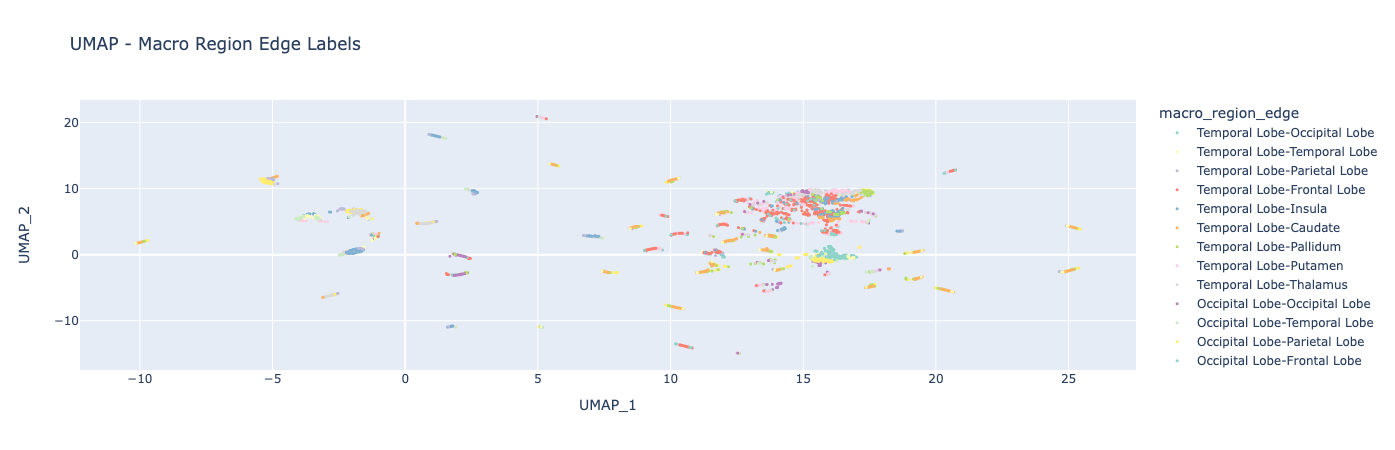

In [69]:
# Assuming you have X_subset, macro_region_edge_labels_subset, and network_edge_labels_subset
# Generate UMAP plot colored by macro_region_edge_labels
print("Generating UMAP plot colored by Macro Region Edge Labels...")
plot_umap_with_labels(X_subset, macro_region_edge_labels_subset, title="UMAP - Macro Region Edge Labels", label_name="macro_region_edge")

Generating UMAP plot colored by Network Edge Labels...


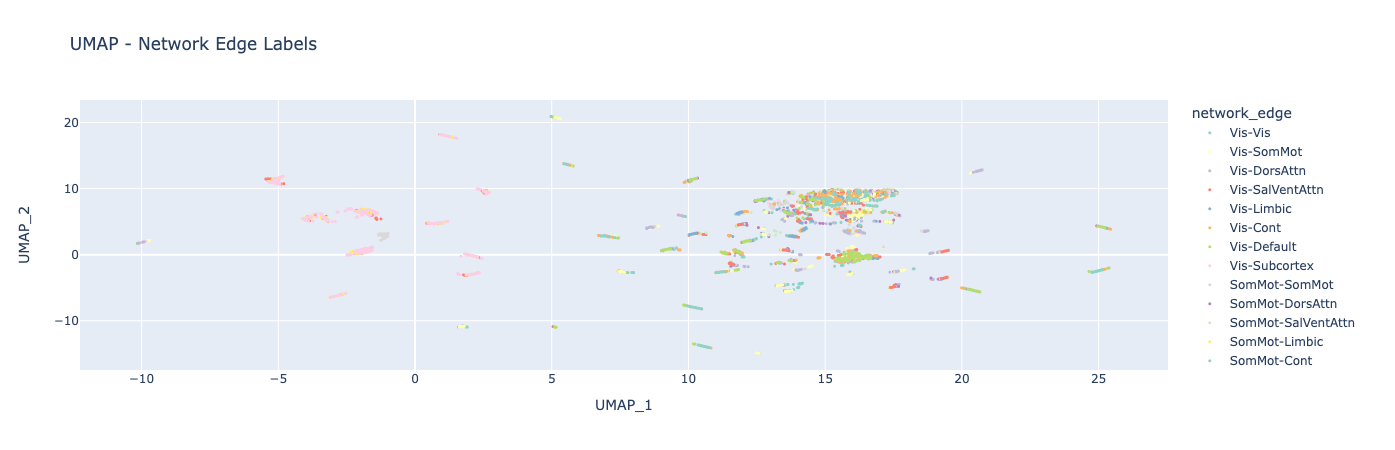

In [71]:
# Generate UMAP plot colored by network_edge_labels
print("Generating UMAP plot colored by Network Edge Labels...")
plot_umap_with_labels(X_subset, network_edge_labels_subset, title="UMAP - Network Edge Labels", label_name="network_edge")

In [72]:
def plot_3d_umap_with_labels(X_subset, edge_labels, title="3D UMAP Plot", label_name="edge_label", color_discrete_sequence=None):
    """
    Generates a 3D UMAP plot with hover information based on edge labels.
    The plot is adjusted with smaller nodes and a discrete color scale.

    Parameters:
    - X_subset: The subsetted input matrix (e.g., gene expression or connectivity matrix)
    - edge_labels: The list of edge labels corresponding to each row in X_subset (e.g., macro-region or network labels)
    - title: Title of the UMAP plot
    - label_name: Name of the label to be used in hover information (e.g., 'macro-region', 'network')
    - color_discrete_sequence: List of colors to use for the discrete color scale. If None, default Plotly colors are used.
    """
    # Step 1: Run UMAP to reduce X_subset to 3D
    umap_model = umap.UMAP(n_components=3, random_state=42)
    umap_embedding = umap_model.fit_transform(X_subset)

    # Step 2: Prepare data for Plotly
    # Convert the UMAP embedding and labels into a DataFrame for Plotly
    umap_df = pd.DataFrame(umap_embedding, columns=['UMAP_1', 'UMAP_2', 'UMAP_3'])
    umap_df[label_name] = edge_labels

    # Step 3: Plot the 3D UMAP using Plotly Express with hover information
    if color_discrete_sequence is None:
        color_discrete_sequence = px.colors.qualitative.Set3  # Default Plotly qualitative colors

    fig = px.scatter_3d(
        umap_df, 
        x='UMAP_1', y='UMAP_2', z='UMAP_3',
        color=label_name, 
        labels={label_name: label_name},
        hover_data={label_name: True},  # Include the label in hover information
        title=title,
        color_discrete_sequence=color_discrete_sequence  # Use discrete color scale for categorical data
    )

    fig.update_traces(marker=dict(size=3))  # Smaller marker size
    fig.update_layout(
        autosize=False,
        width=800,  # Set plot width
        height=800,  # Set plot height
        showlegend=True
    )
    fig.show()


In [73]:
print("Generating 3D UMAP plot colored by Macro Region Edge Labels...")
plot_3d_umap_with_labels(X_subset, macro_region_edge_labels_subset, title="3D UMAP - Macro Region Edge Labels", label_name="macro_region")


Generating 3D UMAP plot colored by Macro Region Edge Labels...


Generating 3D UMAP plot colored by Network Edge Labels...


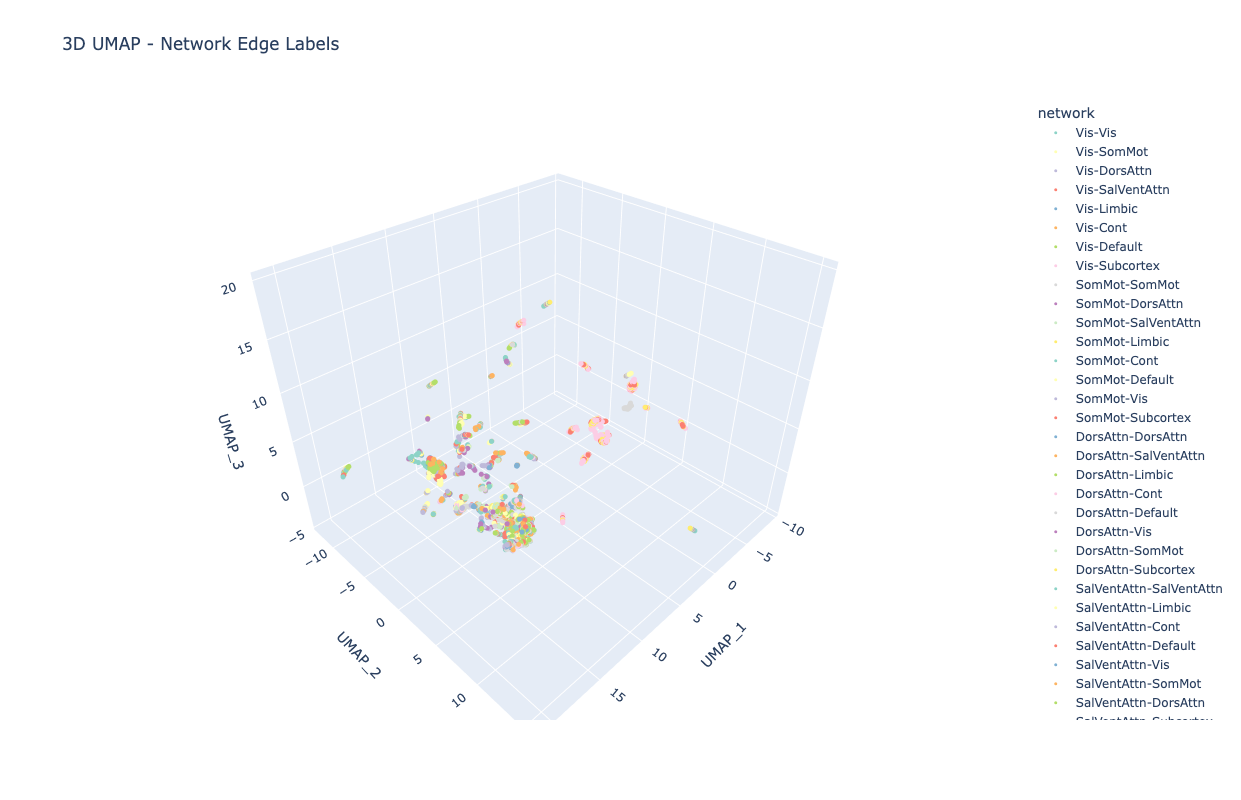

In [74]:
print("Generating 3D UMAP plot colored by Network Edge Labels...")
plot_3d_umap_with_labels(X_subset, network_edge_labels_subset, title="3D UMAP - Network Edge Labels", label_name="network")